In [7]:
x = 5
if (x & 4)==1:
  print('yes')
else:
  print(x&4)

4


In [ ]:
!pip install pyreadstat
!pip install gdown
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade patsy
!pip install --upgrade statsmodels
import pyreadstat
import xgboost as xgb
import gdown
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.6
    Uninstalling patsy-0.5.6:
      Successfully uninstalled patsy-0.5.6
--2024-11-15 07:40:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.141.138, 142.250.141.139, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-11-15 07:40:45--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP req

In [ ]:
file_ids = ['1rL9nfSaWZpWQ_6-nuBHvIQSXqRVrdeoz', '1mt1BPd_ZLzPT1jtZ4WCcnX38mBYHPX6P', '1nUm7tGDi-vdp1Wf0okUDRmMl6Ufv7mRm', '17ctaBw3jfIxqZO_uXMcLuWSjkDDmlkYk', '15x4y3za0YIqS7dVqtuAUW01UkyxvT9A1']
outputs = [f'({age})data1.sav' for age in [3, 6, 12, 18, 24]]
for file_id, output in zip(file_ids, outputs):
  gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

data = pd.DataFrame()
for output in outputs:
  df, _ = pyreadstat.read_sav(output, encoding='latin1')
  data = pd.concat([data, df])
data = data.reset_index(drop=True)
data

Downloading...
From: https://drive.google.com/uc?id=1rL9nfSaWZpWQ_6-nuBHvIQSXqRVrdeoz
To: /content/(3)data1.sav
100%|██████████| 18.9M/18.9M [00:00<00:00, 55.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mt1BPd_ZLzPT1jtZ4WCcnX38mBYHPX6P
To: /content/(6)data1.sav
100%|██████████| 19.1M/19.1M [00:00<00:00, 55.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nUm7tGDi-vdp1Wf0okUDRmMl6Ufv7mRm
To: /content/(12)data1.sav
100%|██████████| 16.1M/16.1M [00:00<00:00, 60.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=17ctaBw3jfIxqZO_uXMcLuWSjkDDmlkYk
To: /content/(18)data1.sav
100%|██████████| 17.8M/17.8M [00:00<00:00, 57.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=15x4y3za0YIqS7dVqtuAUW01UkyxvT9A1
To: /content/(24)data1.sav
100%|██████████| 20.4M/20.4M [00:00<00:00, 30.3MB/s]


,release_id,interviewer_id,baby_sex,baby_doby,baby_dobm,int_y,int_m,int_months,relationship,pfa0101,...,sd4,sd5,video,online1,online2,online3,online4,online5,online6,care1
0,R000019492,30035.0,2.0,2016.0,6.0,2016.0,8.0,2.695890,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R000135549,30004.0,1.0,2016.0,4.0,2016.0,6.0,2.498630,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R000404562,30035.0,2.0,2016.0,4.0,2016.0,7.0,2.498630,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R000422619,30015.0,1.0,2017.0,4.0,2017.0,7.0,3.254795,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R000524812,30086.0,1.0,2017.0,3.0,2017.0,6.0,3.057534,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33837,R999375823,20056.0,1.0,2016.0,12.0,2018.0,12.0,24.197260,3.0,1.0,...,4.0,3.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,2.0
33838,R999537935,20015.0,2.0,2016.0,10.0,2018.0,12.0,25.545205,3.0,1.0,...,4.0,4.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,9999.0
33839,R999576330,30061.0,1.0,2016.0,5.0,2018.0,6.0,24.821918,3.0,1.0,...,3.0,4.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,9999.0
33840,R999724430,30061.0,2.0,2016.0,4.0,2018.0,5.0,24.789041,3.0,1.0,...,4.0,4.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,9999.0


In [ ]:
body_df = data[list(filter(lambda col: col[0:4]=='body', list(data.columns)))]
body_df['age'] = data['int_months']
body_df

,bodyag01,bodyag02,bodyag03,bodyag04,bodyag11,bodyag05,bodyag06,bodyag07,bodyag08,bodyag12,...,bodyaf14,bodycf05,bodycf06,bodyaf15,bodycf07,bodyaf16,bodycf08,bodycf01,bodycf02,age
0,1.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.695890
1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.498630
2,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.498630
3,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.254795
4,1.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.057534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33837,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,3.0,4.0,2.0,1.0,1.0,24.197260
33838,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,1.0,4.0,1.0,2.0,1.0,25.545205
33839,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,3.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,24.821918
33840,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,24.789041


In [ ]:
body_df['total'] = body_df.sum(axis=1)
body_df=body_df[body_df['total']<=200].reset_index(drop=True)
body_df

,bodyag01,bodyag02,bodyag03,bodyag04,bodyag11,bodyag05,bodyag06,bodyag07,bodyag08,bodyag12,...,bodycf05,bodycf06,bodyaf15,bodycf07,bodyaf16,bodycf08,bodycf01,bodycf02,age,total
0,1.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.695890,59.695890
1,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.498630,50.498630
2,1.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.498630,51.498630
3,1.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.254795,62.254795
4,1.0,4.0,4.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.057534,64.057534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33469,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,4.0,2.0,1.0,1.0,24.197260,182.197260
33470,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,1.0,4.0,1.0,2.0,1.0,25.545205,184.545205
33471,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,2.0,4.0,2.0,2.0,1.0,24.821918,187.821918
33472,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,3.0,3.0,2.0,1.0,1.0,24.789041,187.789041


In [ ]:
bins = [0, 4 , 7, 13, 19, 26]
labels = ['3', '6', '12', '18', '24']
body_df['age_categories'] = pd.cut(body_df['age'], bins=bins, labels=labels, right=False)

In [ ]:
body_df['age_categories'].value_counts()

,count
age_categories,
24,6952
18,6892
6,6658
3,6505
12,6449


In [ ]:
body_df = body_df.dropna()


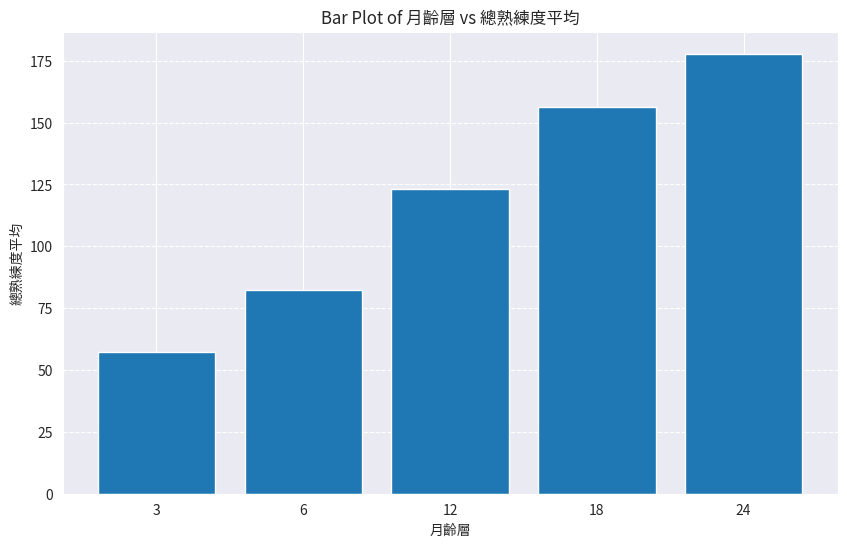

In [ ]:
import matplotlib.pyplot as plt

# 計算每個月齡層的總熟練度平均值
age_categories_mean = body_df.groupby('age_categories')['total'].mean()

# 繪製長條圖
plt.figure(figsize=(10, 6))         # 設定圖表大小
plt.bar(age_categories_mean.index, age_categories_mean.values)  # 使用長條圖
plt.xlabel('月齡層')                # X 軸標籤
plt.ylabel('總熟練度平均')          # Y 軸標籤
plt.title('Bar Plot of 月齡層 vs 總熟練度平均')  # 標題
plt.grid(axis='y', linestyle='--')  # 顯示 Y 軸的格線，增加可讀性
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 假設 body_df 中有特徵欄位以及標籤欄位 'label'
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')
y = body_df['age_categories'].astype('float32')


# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定隨機森林分類器模型
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # 設定 100 顆樹

# 訓練模型
rf_clf.fit(X_train, y_train)

# 使用訓練完成的模型進行預測
y_pred = rf_clf.predict(X_test)

# 計算分類準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# 輸出分類報告與混淆矩陣
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy on Test Set: 0.92
Classification Report:
              precision    recall  f1-score   support

         3.0       0.97      0.99      0.98      1305
         6.0       0.98      0.97      0.98      1367
        12.0       0.91      0.95      0.93      1274
        18.0       0.84      0.84      0.84      1360
        24.0       0.92      0.88      0.90      1386

    accuracy                           0.92      6692
   macro avg       0.92      0.93      0.92      6692
weighted avg       0.92      0.92      0.92      6692

Confusion Matrix:
[[1297    8    0    0    0]
 [  42 1325    0    0    0]
 [   1   12 1206   55    0]
 [   0    2  113 1142  103]
 [   0    1    5  164 1216]]


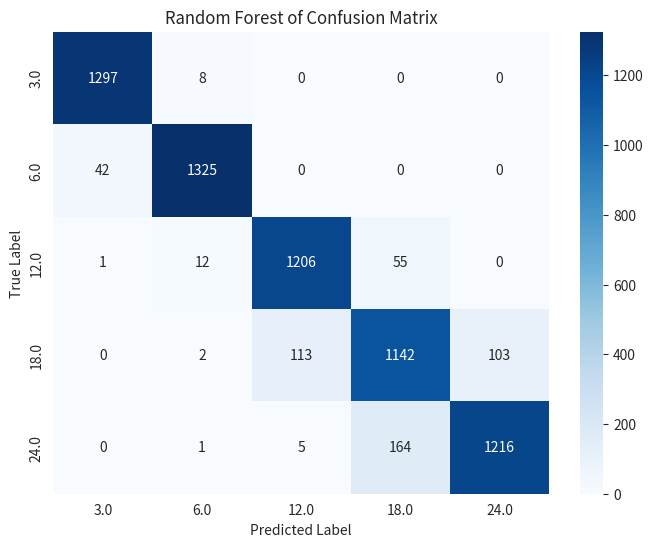

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred)

# 繪製混淆矩陣圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest of Confusion Matrix')
plt.show()


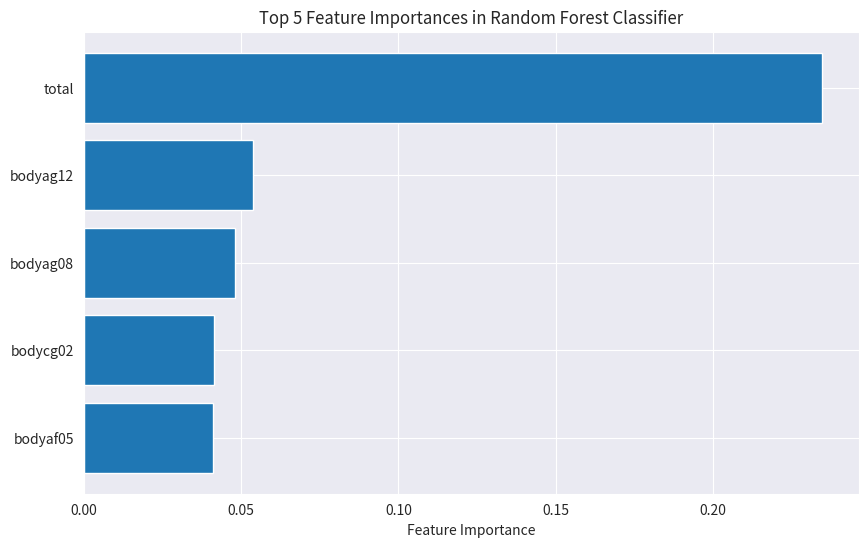

In [ ]:
feature_importances = rf_clf.feature_importances_
features = X.columns

# 將特徵重要性排序，並選擇前五高的特徵
sorted_idx = np.argsort(feature_importances)[-5:]  # 取最高的五個特徵索引
top_features = [features[i] for i in sorted_idx]  # 取得特徵名稱
top_importances = feature_importances[sorted_idx]  # 取得重要性數值

# 繪製前五高的特徵重要性
plt.figure(figsize=(10, 6))
plt.barh(range(5), top_importances, align='center')
plt.yticks(range(5), top_features)
plt.xlabel("Feature Importance")
plt.title("Top 5 Feature Importances in Random Forest Classifier")
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 假設 body_df 中有 'feature1' 這個特徵欄位，和 'label' 這個五類標籤欄位
X = body_df[['total']]  # 使用單一特徵
y = body_df['age_categories']  # 標籤 (五分類: 0, 1, 2, 3, 4)

# 資料分割，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 隨機森林分類器模型
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_clf.fit(X_train, y_train)

# 預測測試集
y_pred = rf_clf.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# 顯示分類報告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 顯示混淆矩陣
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy on Test Set: 0.93
Classification Report:
              precision    recall  f1-score   support

          12       0.91      0.92      0.92      1274
          18       0.87      0.87      0.87      1360
          24       0.93      0.91      0.92      1386
           3       0.97      0.98      0.98      1305
           6       0.97      0.96      0.96      1367

    accuracy                           0.93      6692
   macro avg       0.93      0.93      0.93      6692
weighted avg       0.93      0.93      0.93      6692

Confusion Matrix:
[[1173   73    8    1   19]
 [  85 1181   90    0    4]
 [  14  107 1263    0    2]
 [   0    0    0 1284   21]
 [  10    1    2   42 1312]]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 假設 body_df 中有 'feature1' 這個特徵欄位，和 'y' 這個連續性目標變數欄位
X = body_df[['total']]  # 使用單一特徵
y = body_df['age']  # 目標變數 (連續性數值)

# 資料分割，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 隨機森林回歸器模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_regressor.fit(X_train, y_train)

# 預測測試集
y_pred = rf_regressor.predict(X_test)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 計算 R-squared (R²) 評估模型的擬合度
r2 = r2_score(y_test, y_pred)
print(f"R-squared on Test Set: {r2:.2f}")


# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')

plt.scatter(X_test['total'], y_test)
plt.scatter(X_test['total'], y_pred)

plt.show()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 假設 body_df 中有 'feature1' 這個特徵欄位，和 'y' 這個連續性目標變數欄位
X = body_df[['total']]  # 使用單一特徵
y = body_df['age']  # 目標變數 (連續性數值)

# 資料分割，80% 用於訓練，20% 用於測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 隨機森林回歸器模型
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_regressor.fit(X_train, y_train)

# 預測測試集
y_pred = rf_regressor.predict(X_test)

# 計算均方誤差 (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 計算 R-squared (R²) 評估模型的擬合度
r2 = r2_score(y_test, y_pred)
print(f"R-squared on Test Set: {r2:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')

# 繪製測試集真實值與預測值的散佈圖
plt.figure(figsize=(10, 6))
plt.scatter(X_test['total'], y_test, color='blue', alpha=0.5, label='Actual',s=4)  # 設置透明度 alpha
plt.scatter(X_test['total'], y_pred, color='red', alpha=0.5, label='Predicted',s=4)  # 設置透明度 alpha
plt.xlabel('Total')
plt.ylabel('Age')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 假設您已有 body_df 並分割了特徵 X 和標籤 y
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')
y = body_df['age'].astype('float32')

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定 RandomForestRegressor 並調整參數以減少過擬合
model = RandomForestRegressor(
    n_estimators=200,           # 樹的數量（可以嘗試增加，如 500）
    max_depth=10,               # 限制樹的深度以避免過擬合
    min_samples_split=10,       # 每棵樹的最小分裂數，增加會避免樹分得太細
    min_samples_leaf=5,         # 每個葉節點的最小樣本數，增加會避免樹分得太細
    max_features='sqrt',        # 每次分裂使用的最大特徵數
    random_state=42
)

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上做預測
y_pred = model.predict(X_test)

# 計算 MSE 評估模型的效果
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 假設您已有 body_df 並分割了特徵 X 和標籤 y
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')
y = body_df['age'].astype('float32')

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定 RandomForestRegressor 並調整參數以減少過擬合
model = RandomForestRegressor(
    n_estimators=300,           # 樹的數量（可以嘗試增加，如 500）
    max_depth=20,               # 限制樹的深度以避免過擬合
    min_samples_split=10,       # 每棵樹的最小分裂數，增加會避免樹分得太細
    min_samples_leaf=5,         # 每個葉節點的最小樣本數，增加會避免樹分得太細
    max_features='sqrt',        # 每次分裂使用的最大特徵數
    random_state=42
)

# 訓練模型
model.fit(X_train, y_train)

# 在測試集上做預測
y_pred = model.predict(X_test)

# 計算 MSE 評估模型的效果
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')



In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age in Random Forest regression")
plt.show()


In [ ]:
#test幫我跑

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 假設您已有 body_df，並選擇其中一個特徵（如 'height'）來進行回歸
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')
y = body_df['age'].astype('float32')       # 目標變數為 'age'

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 使用線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression Mean Squared Error: {mse_linear:.2f}")

# 計算線性回歸模型的準確率
tolerance = 2
diff_linear = abs(y_test - y_pred_linear)
accurate_predictions_linear = sum(diff_linear <= tolerance)
accuracy_percentage_linear = accurate_predictions_linear / len(y_test) * 100
print(f'Linear Regression模型在±{tolerance}範圍內的準確率: {accuracy_percentage_linear:.2f}%')

### 使用隨機森林回歸模型
# 設置隨機森林參數網格來進行調參
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # 設置不同樹的數量
    'max_depth': [None, 10, 20],     # 設置不同深度
    'min_samples_split': [2, 5, 10]  # 設置不同的分割數量
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# 打印最佳參數
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# 使用最佳參數的隨機森林模型進行預測
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")

# 計算隨機森林模型的準確率
diff_rf = abs(y_test - y_pred_rf)
accurate_predictions_rf = sum(diff_rf <= tolerance)
accuracy_percentage_rf = accurate_predictions_rf / len(y_test) * 100
print(f'Random Forest模型在±{tolerance}範圍內的準確率: {accuracy_percentage_rf:.2f}%')

Linear Regression Mean Squared Error: 0.00
Linear Regression模型在±2範圍內的準確率: 100.00%


KeyboardInterrupt: 

Testing R-squared: 0.9911222457885742
Training R-squared: 0.9984610080718994
模型在±1範圍內的準確率: 89.67%


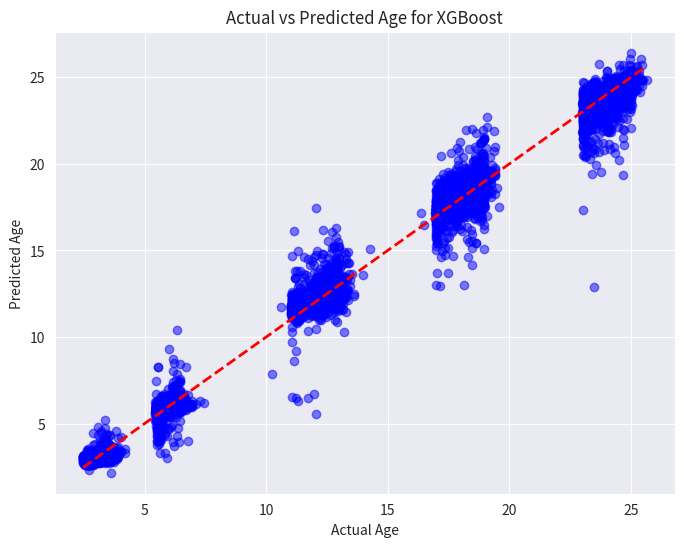

In [ ]:
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')
#X = body_df[['total']].astype('float32')
y = body_df['age'].astype('float32')  # Target variable is age (continuous)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use XGBRegressor for regression tasks with continuous target variables
xgboostModel = xgb.XGBRegressor(n_estimators=300, learning_rate=0.3)

# Train the model
xgboostModel.fit(X_train, y_train)

# Make predictions
predicted = xgboostModel.predict(X_test)

# Evaluate the model (using appropriate metrics for regression)
print('Testing R-squared:', xgboostModel.score(X_test, y_test))
print('Training R-squared:', xgboostModel.score(X_train, y_train))

tolerance = 1
diff = abs(y_test - predicted)
accurate_predictions = np.sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age for XGBoost")
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 假設您已有 body_df 並分割了特徵 X 和標籤 y
X = body_df.drop(columns=['age',  'age_categories']).astype('float32')
y = body_df['age'].astype('float32')

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf', C=30, gamma='scale')
# 訓練模型
svr.fit(X_train, y_train)

# 使用訓練完成的模型進行預測
y_pred = svr.predict(X_test)

# 計算 MSE 評估模型的效果
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = np.sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')


In [ ]:
# 計算目標變數的範圍或標準差
target_range = y.max() - y.min()  # 計算目標變數範圍
tolerance = target_range * 0.05  # 例如，設定 tolerance 為範圍的 5%
print(f"Suggested Tolerance: {tolerance:.2f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age for SVR")
plt.show()


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 假設您已有 body_df，並分割了特徵 X 和標籤 y
X = body_df.drop(columns=['age',  'age_categories']).astype('float32')
y = body_df['age_categories'].astype('float32')

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定 SVM 分類模型
svm_clf = SVC(kernel='rbf', C=30, gamma='scale')  # 使用 RBF 核，指定 C 和 gamma 參數

# 訓練模型
svm_clf.fit(X_train, y_train)

# 使用訓練完成的模型進行預測
y_pred = svm_clf.predict(X_test)

# 計算分類準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# 輸出分類報告與混淆矩陣
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 計算混淆矩陣並可視化
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for SVC")
plt.show()


In [ ]:
#TEST

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 畫出實際值與預測值的散點圖
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

# 2. 預測誤差的分佈圖
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=20, kde=True)
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.title('Distribution of Prediction Errors')
plt.show()

# 3. 各組參數的 MSE 視覺化
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_C', 'param_epsilon', 'param_gamma', 'mean_test_score']]
results['mean_test_score'] = -results['mean_test_score']  # 轉成正的 MSE 值

plt.figure(figsize=(10, 6))
sns.lineplot(data=results, x='param_C', y='mean_test_score', hue='param_epsilon', style='param_gamma', markers=True, dashes=False)
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different Hyperparameter Combinations')
plt.legend(title='Epsilon and Gamma')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError # Import MeanSquaredError

# 假設您已有 body_df 並分割了特徵 X 和標籤 y
X = body_df.drop(columns=['age', 'total', 'age_categories']).astype('float32')
y = body_df['age'].astype('float32')

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 構建神經網路模型
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 輸入層
    Dense(32, activation='relu'),  # 隱藏層
    Dense(16, activation='relu'),  # 隱藏層
    Dense(1)  # 輸出層
])

# 編譯模型
# Use MeanSquaredError for RMSE calculation
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])

# 訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 使用測試集進行預測
y_pred = model.predict(X_test).flatten()

# 計算 MSE 評估模型的效果
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 2
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

X = body_df.drop(columns=['age',  'age_categories']).astype('float32')
y = body_df['age'].astype('float32')



# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 構建神經網路模型
model = Sequential([
    Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(32, activation='elu'),
    Dense(1)
])


# 編譯模型
# Use MeanSquaredError for RMSE calculation
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# 訓練模型
callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[callback, reduce_lr]
)

# 使用測試集進行預測
y_pred = model.predict(X_test).flatten()

# 計算 MSE 評估模型的效果
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 2
diff = abs(y_test - y_pred)
accurate_predictions = sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.1f}%')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # 對角線
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.show()


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# 評估在容忍範圍內的準確率
tolerance = 1
diff = abs(y_test - y_pred)
accurate_predictions = np.sum(diff <= tolerance)
accuracy_percentage = accurate_predictions / len(y_test) * 100
print(f'模型在±{tolerance}範圍內的準確率: {accuracy_percentage:.2f}%')




In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 body_df 是您的資料集
X = body_df.drop(columns=['age', 'age_categories']).astype('float32')

# 重新編碼 age_categories
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(body_df['age_categories'])  # 轉換為 0 到 4 的範圍

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特徵縮放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 構建神經網路模型
model = Sequential([
    Dense(128, activation='elu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(32, activation='elu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 設定回調函數
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
callback = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# 訓練模型
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.2,
    verbose=0,
    callbacks=[callback, reduce_lr]
)

# 進行預測並轉換為原始分類標籤
y_pred = label_encoder.inverse_transform(np.argmax(model.predict(X_test), axis=1))

# 計算分類準確率
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), y_pred)
print(f"Accuracy on Test Set: {accuracy:.2f}")

# 繪製混淆矩陣
cm = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
